In [1]:
import namdextractor as ne
import namdtoopenmm as n2omm
import numpy as np
import matplotlib.pyplot as plt

# NamdEnergyExtractor Example

In [2]:
data = ne.NamdEnergyExtractor('namd.log')

Use the help() method for class use


In [3]:
namd_potentials = data.energy_extractor()

In [4]:
print(namd_potentials[1:])

[-133818.7182 -133790.7055 -133899.3875 -134061.6655 -133915.1743
 -133837.1118 -133946.3899 -133683.963  -133832.9325 -133466.2719]


In [5]:
# For energy breakdown
print('These are the energies taken from the NAMD output file:\n', data.data_from_file)

# keyed like so
print('\nThese are the VDW energies:\n', data.data_from_file['VDW'])

# To convert a list to a numpy array
print('\nThese are the ELECT energies as a numpy array:\n', type(np.array(data.data_from_file['ELECT'])))

These are the energies taken from the NAMD output file:
 {'TS': [0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0], 'BOND': [4191.9693, 4148.8716, 4228.9591, 4182.1077, 4240.4136, 4256.4292, 4224.1945, 4277.9965, 4199.3138, 4280.4906, 4251.1922], 'ANGLE': [20566.7214, 20621.7963, 20586.5324, 20611.7102, 20538.1105, 20580.3419, 20636.3164, 20680.2259, 20883.017, 20636.1597, 20924.427], 'DIHED': [14435.1734, 14489.7252, 14430.6686, 14459.5073, 14392.3628, 14431.1616, 14521.5314, 14502.8393, 14523.3847, 14502.4492, 14465.8492], 'IMPRP': [291.6416, 302.5105, 289.6594, 280.1285, 286.4842, 293.2388, 290.5751, 292.1266, 285.4664, 299.8117, 309.6878], 'ELECT': [-174893.6905, -174494.4375, -174571.7134, -174642.6551, -174722.1292, -174839.1784, -174664.1211, -174835.4786, -175033.5913, -174905.6868, -174922.0193], 'VDW': [1405.9329, 1112.8157, 1245.1885, 1209.814, 1203.0927, 1362.8326, 1154.392, 1135.9004, 1458.4465, 1353.8432, 1504.5913], 'BOUNDARY': [0.0, 0.0, 0.0, 0

# NamdToOpenmmTools Example

In [6]:
parameters = ['par_all36_prot.prm', 'top_all36_prot.rtf',
              'par_all36_lipid.prm', 'top_all36_lipid.rtf',
              'par_all36_carb.prm', 'top_all36_carb.rtf',
              'par_all36_cgenff.prm', 'top_all36_cgenff.rtf',
              'par_all36_na.prm', 'top_all36_na.rtf', 'toppar_water_ions_namd.str']
pbc = (90.3397026816, 91.3840923081, 83.3302382086)
traj = n2omm.NamdToOpenmmTools('example.dcd', 'example.psf', parameters, 320, pbc)

Use the help() method for class use


In [7]:
print('I am using the:', traj.simulation.context.getPlatform().getName())
print('Hence the GPU')

I am using the: CUDA
Hence the GPU


In [8]:
# Compute energies from trajectory file, display time in picoseconds, and print_output as they are computed
openmm_potentials, energy_breakdown = traj.compute_energies(100, time='picoseconds', print_output=True)

Time:                                       0.2000 picoseconds
HarmonicBondForce:                       4148.8642
HarmonicAngleForce:                     15337.8141
HarmonicBondForce:                       5283.9920
PeriodicTorsionForce:                   14530.5591
CustomTorsionForce:                       302.5102
CMAPTorsionForce:                         -40.8321
NonbondedForce:                       -171499.8388
CustomNonbondedForce:                   -1873.2212
CMMotionRemover:                            0.0000
MonteCarloMembraneBarostat:                 0.0000
Total Potential energy:               -133810.1878

Time:                                       0.4000 picoseconds
HarmonicBondForce:                       4228.9544
HarmonicAngleForce:                     15324.6071
HarmonicBondForce:                       5261.9213
PeriodicTorsionForce:                   14478.8088
CustomTorsionForce:                       289.6591
CMAPTorsionForce:                         -48.1377
Nonbon

In [9]:
# If output was suppressed, i.e. print_output was set to False, one can later print the output like so
print(*energy_breakdown, sep='\n')

Time:                                       0.2000 picoseconds
HarmonicBondForce:                       4148.8642
HarmonicAngleForce:                     15337.8141
HarmonicBondForce:                       5283.9920
PeriodicTorsionForce:                   14530.5591
CustomTorsionForce:                       302.5102
CMAPTorsionForce:                         -40.8321
NonbondedForce:                       -171499.8388
CustomNonbondedForce:                   -1873.2212
CMMotionRemover:                            0.0000
MonteCarloMembraneBarostat:                 0.0000
Total Potential energy:               -133810.1878

Time:                                       0.4000 picoseconds
HarmonicBondForce:                       4228.9544
HarmonicAngleForce:                     15324.6071
HarmonicBondForce:                       5261.9213
PeriodicTorsionForce:                   14478.8088
CustomTorsionForce:                       289.6591
CMAPTorsionForce:                         -48.1377
Nonbon

# NAMD and OpenMM Comparision

In [10]:
potential_diff = namd_potentials[1:] - openmm_potentials
print(potential_diff, '\n')
print('mean +/- 3*sigma')
print(np.mean(potential_diff),'+/-', 3*np.sqrt(np.var(potential_diff)))

[-8.5304 -8.0631 -7.4    -9.1259 -7.7709 -7.9828 -8.2743 -9.172  -9.1812
 -9.1554] 

mean +/- 3*sigma
-8.465600000004633 +/- 1.8918830428705462


In [11]:
R2 = np.corrcoef(namd_potentials[1:], openmm_potentials)
print(R2)

[[1.         0.99999261]
 [0.99999261 1.        ]]


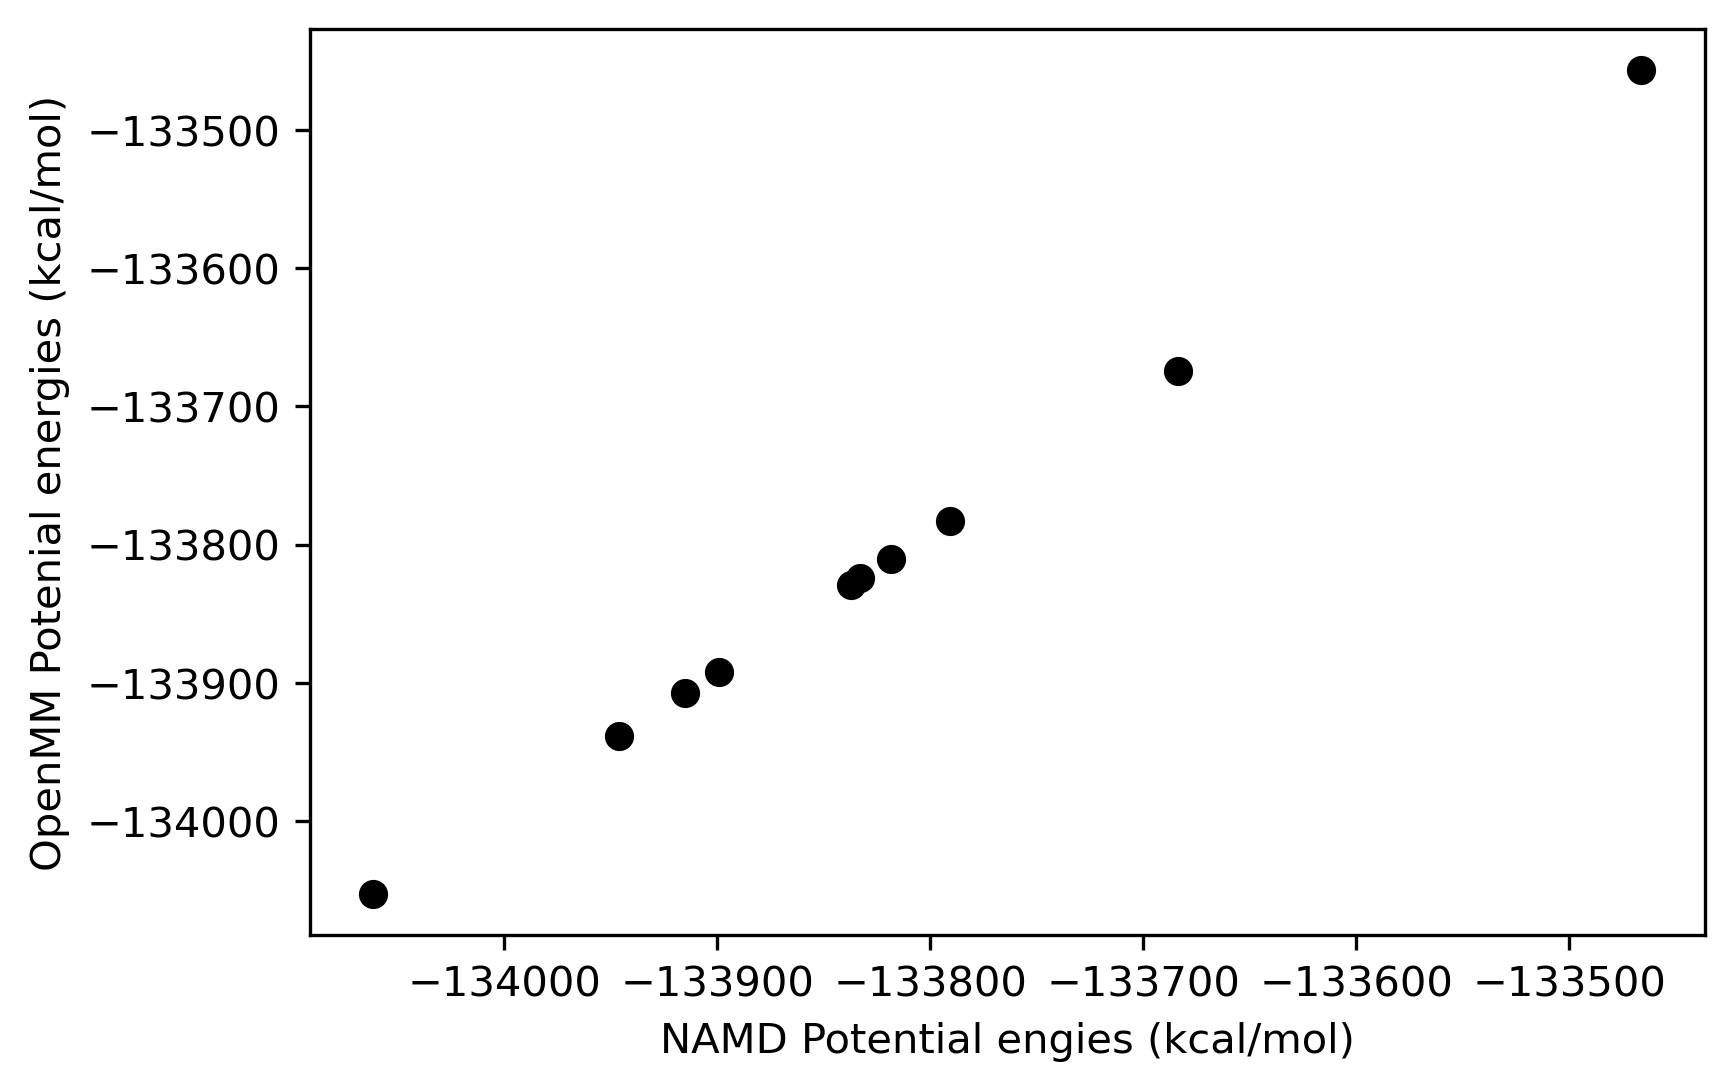

In [12]:
plt.figure(dpi=300)

plt.plot(namd_potentials[1:], openmm_potentials, 'ok')
plt.xlabel('NAMD Potential engies (kcal/mol)')
plt.ylabel('OpenMM Potenial energies (kcal/mol)')

plt.show()